In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re

In [ ]:
df = pd.read_csv(r"..\data\raw\products_details.csv")
df. head(5)

,name,product_code,brand,category,subcategory,family,reviews,rating,url_image,cmr_price,event_price,internet_price,normal_price,seller,url_product
0,Fotoprotector Fusion Water Magic Isdin,19994504,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,193,4.7565,https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH...,NaN,NaN,104.90,124.90,falabella,https://www.falabella.com.pe/falabella-pe/prod...
1,Sombrilla De Playa Doo Australia Uv+30,883168280,DOO AUSTRALIA,Jardín y terraza,"Piscinas, spa e inflables",Toallas de Playa,2,3.0000,https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH...,NaN,NaN,39.89,79.90,falabella,https://www.falabella.com.pe/falabella-pe/prod...
2,ISDIN Fotoprotector Fusion Water Color MEDIUM ...,16416899,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,1012,4.8399,https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH...,99.9,NaN,104.90,124.90,falabella,https://www.falabella.com.pe/falabella-pe/prod...
3,ISDIN FotoUltra Age Repair SPF50 50ML - Bloque...,16416879,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,485,4.8660,https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH...,99.9,NaN,111.90,139.90,falabella,https://www.falabella.com.pe/falabella-pe/prod...
4,Protector Solar Anthelios UVMune 400 Oil Contr...,16434666,LA ROCHE POSAY,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,165,4.7212,https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH...,NaN,NaN,119.90,NaN,falabella,https://www.falabella.com.pe/falabella-pe/prod...


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            530 non-null    object 
 1   product_code    530 non-null    int64  
 2   brand           530 non-null    object 
 3   category        530 non-null    object 
 4   subcategory     530 non-null    object 
 5   family          530 non-null    object 
 6   reviews         530 non-null    int64  
 7   rating          530 non-null    float64
 8   url_image       530 non-null    object 
 9   cmr_price       6 non-null      float64
 10  event_price     0 non-null      float64
 11  internet_price  530 non-null    object 
 12  normal_price    488 non-null    object 
 13  seller          530 non-null    object 
 14  url_product     530 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 62.2+ KB


In [ ]:
# df[df['normal_price'].unique()]
# df[df['normal_price'].isna()]

,name,product_code,brand,category,subcategory,family,reviews,rating,url_image,internet_price,normal_price,seller,url_product,price_diff_%


In [ ]:
#Delete columns cmr_price and event_price
df = df.drop(columns=["cmr_price","event_price"], axis=1)
# Completando campos nulos de normal price por el de internet price
df['normal_price'] =df['normal_price'].fillna(df['internet_price'])
# Convert normal_price and internet price to number
df[['normal_price', 'internet_price']] = df[['normal_price', 'internet_price']]\
    .apply(lambda row: pd.Series({col: float(row[col].replace(',', '')) 
                                  if isinstance(row[col], str) 
                                  else row[col] for col in row.index}),
                                axis=1
           )
# create column calculated
df['price_diff_%'] = (df['normal_price'] - df['internet_price'])/df['normal_price'] *100


In [ ]:
df_duplicates = df[df.duplicated(keep=False)]
len(df_duplicates)

91

In [12]:
df = df.drop_duplicates()
len(df)

439

In [245]:
data_cleaned = df.copy()
data_cleaned.head(5)

,name,product_code,brand,category,subcategory,family,reviews,rating,url_image,internet_price,normal_price,seller,url_product,price_diff_%
0,Fotoprotector Fusion Water Magic Isdin,19994504,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,193,4.7565,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/19994504_1/w=800,h=800,fit=pad",104.90,124.9,falabella,https://www.falabella.com.pe/falabella-pe/product/19994504/Fotoprotector-Fusion-Water-Magic-Isdin/19994504,16.012810
1,Sombrilla De Playa Doo Australia Uv+30,883168280,DOO AUSTRALIA,Jardín y terraza,"Piscinas, spa e inflables",Toallas de Playa,2,3.0000,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/883168280_1/w=800,h=800,fit=pad",39.89,79.9,falabella,https://www.falabella.com.pe/falabella-pe/product/prod17892040/Sombrilla-De-Playa-Doo-Australia-Uv+30/883168280,50.075094
2,ISDIN Fotoprotector Fusion Water Color MEDIUM SPF50 50ML - Bloqueador solar facial con color Oil Control,16416899,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,1012,4.8399,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/16416899_1/w=800,h=800,fit=pad",104.90,124.9,falabella,https://www.falabella.com.pe/falabella-pe/product/16416899/ISDIN-Fotoprotector-Fusion-Water-Color-MEDIUM-SPF50-50ML-Bloqueador-solar-facial-con-color-Oil-Control/16416899,16.012810
3,ISDIN FotoUltra Age Repair SPF50 50ML - Bloqueador solar facial con triple acción antiedad,16416879,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,485,4.8660,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/16416879_1/w=800,h=800,fit=pad",111.90,139.9,falabella,https://www.falabella.com.pe/falabella-pe/product/16416879/ISDIN-FotoUltra-Age-Repair-SPF50-50ML-Bloqueador-solar-facial-con-triple-accion-antiedad/16416879,20.014296
4,Protector Solar Anthelios UVMune 400 Oil Control Toque Seco con Color FPS 50+ 50ml,16434666,LA ROCHE POSAY,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,165,4.7212,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/16434666_01/w=800,h=800,fit=pad",119.90,119.9,falabella,https://www.falabella.com.pe/falabella-pe/product/16434666/Protector-Solar-Anthelios-UVMune-400-Oil-Control-Toque-Seco-con-Color-FPS-50+-50ml/16434666,0.000000


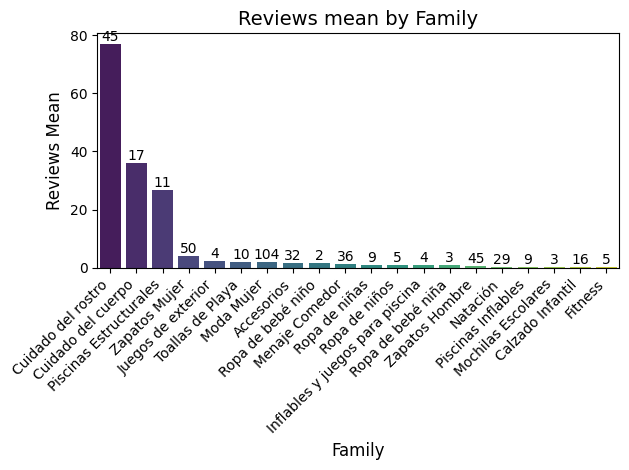

In [247]:
reviews_per_family = data_cleaned.groupby(by='family', as_index=False) \
                    .agg(
                        mean_reviews = ('reviews', 'mean'),
                        count_products = ('name', 'count')
                    ).sort_values(by="mean_reviews", ascending=False)


plt.Figure(figsize=(8,6))
barplot = sns.barplot(x="family", y='mean_reviews', hue='family', data=reviews_per_family,palette='viridis')

plt.title('Reviews mean by Family', fontsize=14)
plt.xlabel('Family', fontsize=12)
plt.ylabel('Reviews Mean', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar in barplot.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()

    family_name = barplot.get_xticklabels()[int(x + width/2)].get_text()
    product_count = reviews_per_family[reviews_per_family['family'] == family_name]['count_products'].iloc[0]

    plt.text(x + width/2,
             height,
             f'{int(product_count)}',
             ha='center',
             va='bottom')

plt.tight_layout()
plt.show()


count     439.000000
mean       11.328018
std        61.715076
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      1012.000000
Name: reviews, dtype: float64


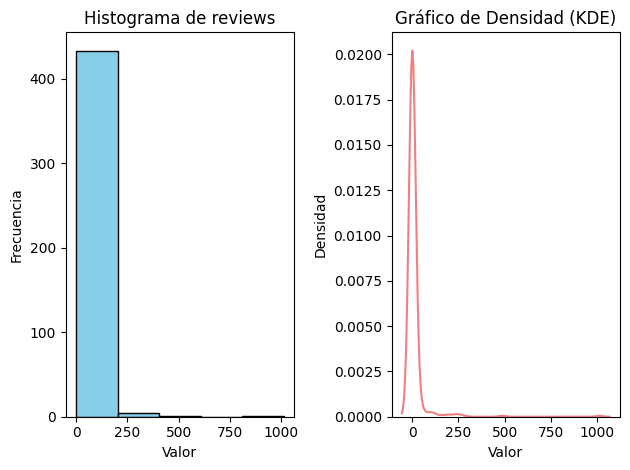

In [ ]:
print(data_cleaned['reviews'].describe())

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].hist(data_cleaned['reviews'], bins=5, edgecolor='black', color='skyblue')
axes[0].set_title('Histograma de reviews')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')

sns.kdeplot(data=data_cleaned['reviews'], ax=axes[1], color='lightcoral')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Gráfico de Densidad (KDE)')

plt.tight_layout()

plt.show()

In [261]:
# Define el valor de 'm' (mínimo de reviews)
m = 5

# Rating promedio global (C)
C = data_cleaned['rating'].mean()

# Rating Ponderado (IMDb)
# (v / (v + m)) * R ) + ( (m / (v + m)) * C

def weighted_rating(dataframe, m=m, C=C):
    v = dataframe['reviews']
    R = dataframe['rating']
    return ((v / (v + m)) * R) + ((m / (v + m)) * C)

data_cleaned['weighted_rating'] = data_cleaned.apply(weighted_rating, axis=1)
data_cleaned[['name', 'family', 'reviews', 'rating', 'weighted_rating']].sort_values(by="weighted_rating", ascending=False).head()

,name,family,reviews,rating,weighted_rating
279,Protector Solar Corporal Anthelios Spray Invisible FPS 50+ 200ml,Cuidado del cuerpo,282,4.9362,4.891143
3,ISDIN FotoUltra Age Repair SPF50 50ML - Bloqueador solar facial con triple acción antiedad,Cuidado del rostro,485,4.8660,4.840326
2,ISDIN Fotoprotector Fusion Water Color MEDIUM SPF50 50ML - Bloqueador solar facial con color Oil Control,Cuidado del rostro,1012,4.8399,4.827658
93,ISDIN Fotoprotector Fusion Water Color LIGHT SPF50 50ML - Bloqueador solar facial con color Oil Control,Cuidado del rostro,243,4.7901,4.740903
20,Protector Solar Facial Anti-Aging Proteos Screen Spf50+ 40 ml,Cuidado del rostro,83,4.8554,4.713044


In [ ]:
aggregate_rating_weighted = data_cleaned.groupby(by='family', as_index=False).agg(
    mean_weighted_rating=('weighted_rating', 'mean'),
    count_products=('name', 'count')
)
aggregate_rating_weighted= aggregate_rating_weighted.sort_values(by="mean_weighted_rating", ascending=False)
aggregate_rating_weighted

,family,mean_weighted_rating,count_products
3,Cuidado del rostro,3.606073,45
2,Cuidado del cuerpo,3.602073,17
11,Piscinas Estructurales,3.163462,11
14,Ropa de bebé niño,2.949348,2
17,Toallas de Playa,2.894719,10
0,Accesorios,2.825844,32
6,Juegos de exterior,2.774939,4
15,Ropa de niñas,2.748053,9
9,Moda Mujer,2.739571,104
19,Zapatos Mujer,2.731600,50


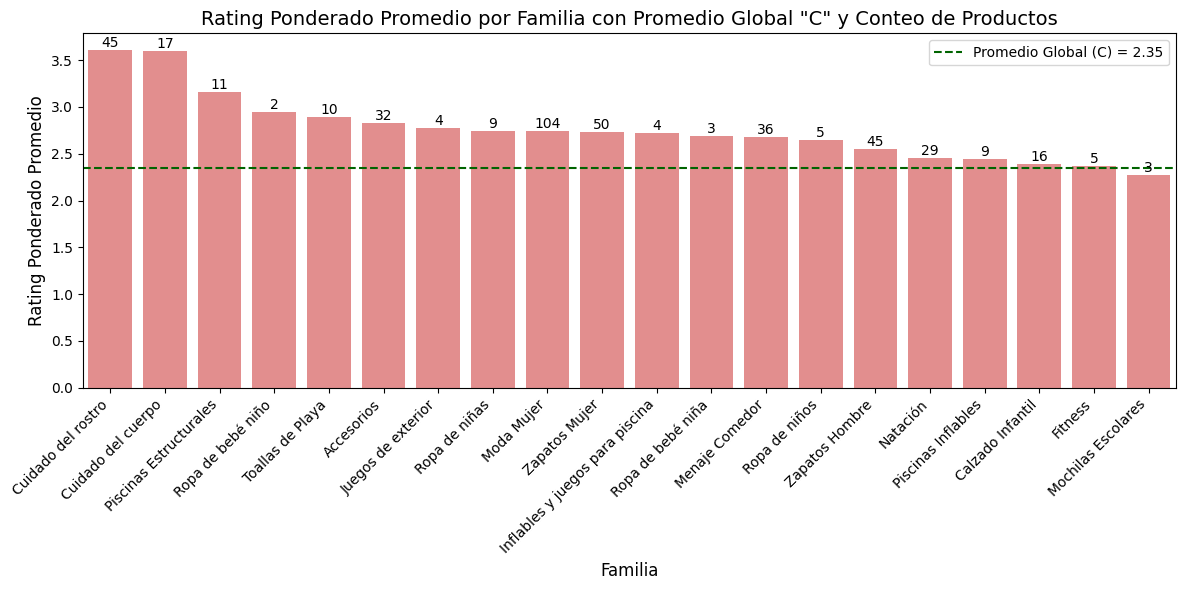

In [ ]:
plt.figure(figsize=(12, 6))
barplot_weighted = sns.barplot(x='family', y='mean_weighted_rating', data=aggregate_rating_weighted, color='lightcoral')

plt.title('Rating Ponderado Promedio por Familia con Promedio Global "C" y Conteo de Productos', fontsize=14)
plt.xlabel('Familia', fontsize=12)
plt.ylabel('Rating Ponderado Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.axhline(y=C, color='darkgreen', linestyle='--', linewidth=1.5, label=f'Promedio Global (C) = {C:.2f}')

for bar in barplot_weighted.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()

    family_name = barplot_weighted.get_xticklabels()[int(x + width/2)].get_text()
    product_count = aggregate_rating_weighted[aggregate_rating_weighted['family'] == family_name]['count_products'].iloc[0]

    plt.text(x + width/2,
             height,
             f'{int(product_count)}',
             ha='center',
             va='bottom')

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [92]:
pd.set_option('display.max_colwidth', None)

In [267]:
data_cleaned[data_cleaned['family'] =="Mochilas Escolares"]

,name,product_code,brand,category,subcategory,family,reviews,rating,url_image,internet_price,normal_price,seller,url_product,price_diff_%,weighted_rating
220,Sandalias Hombre Tides 2.0 Classic Blue,20733301,BILLABONG,Niños y Juguetería,Escolares,Mochilas Escolares,0,0.0,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/20733301_1/w=800,h=800,fit=pad",71.92,89.9,falabella,https://www.falabella.com.pe/falabella-pe/product/20733296/Sandalias-Hombre-Tides-2.0-Classic-Blue/20733301,20.0,2.349927
222,Sandalias Hombre Tides 2.0 Print Brown,20733312,BILLABONG,Niños y Juguetería,Escolares,Mochilas Escolares,0,0.0,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/20733312_1/w=800,h=800,fit=pad",71.92,89.9,falabella,https://www.falabella.com.pe/falabella-pe/product/20733308/Sandalias-Hombre-Tides-2.0-Print-Brown/20733312,20.0,2.349927
387,Sandalias Hombre Tides 2.0 Grey,20733303,BILLABONG,Niños y Juguetería,Escolares,Mochilas Escolares,1,1.0,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/20733303_1/w=800,h=800,fit=pad",71.92,89.9,falabella,https://www.falabella.com.pe/falabella-pe/product/20733302/Sandalias-Hombre-Tides-2.0-Grey/20733303,20.0,2.124939


In [ ]:
import os
from dotenv import load_dotenv
from google import genai

load_dotenv()
API_KEY = os.getenv("API_GEMINI")

client = genai.Client(api_key=API_KEY)


In [ ]:
def relation_check_batch(names, families):
    """
    Verifica si la familia se corresponde con la descripción del producto para una lista de productos.
    """
    try:
        prompt_batches = ""
        for i in range(len(names)):
            prompt_batches += f"""
            ¿La siguiente familia se corresponde con la descripción del producto?

            Producto: {names[i]}
            Familia: {families[i]}

            Responde solo con "si" o "no".
            """

        chat = client.models.generate_content(
            model="gemini-2.0-flash-exp",
            contents=prompt_batches 
        )

        response_ia_batch = chat.text.strip().lower()

        individual_responses = response_ia_batch.strip().split('\n')

        results = []
        affirmative_responses = {"si", "sí"}

        for response in individual_responses:
            response = response.strip().lower()
            if response in affirmative_responses:
                results.append(True)
            elif response == "no":
                results.append(False)
            else:
                print(f"Respuesta inesperada de la IA para lote: {response}")
                results.append(None)

        return results

    except Exception as e:
        print(f"Error al obtener respuesta de la IA para lote: {e}")
        return [None] * len(names)


batch_size = 30
data_cleaned['relation_batch'] = None

for i in range(0, len(data_cleaned), batch_size):
    batch_df = data_cleaned.iloc[i:i + batch_size]
    names_batch = batch_df['name'].tolist()
    families_batch = batch_df['family'].tolist()

    batch_results = relation_check_batch(names_batch, families_batch)

    data_cleaned.loc[batch_df.index, 'relation_batch'] = batch_results
    time.sleep(2)

print(data_cleaned.head(10))

                                                                                                       name  \
0                                                                    Fotoprotector Fusion Water Magic Isdin   
1                                                                    Sombrilla De Playa Doo Australia Uv+30   
2  ISDIN Fotoprotector Fusion Water Color MEDIUM SPF50 50ML - Bloqueador solar facial con color Oil Control   
3                ISDIN FotoUltra Age Repair SPF50 50ML - Bloqueador solar facial con triple acción antiedad   
4                        Protector Solar Anthelios UVMune 400 Oil Control Toque Seco con Color FPS 50+ 50ml   
5                ISDIN FotoUltra Age Repair COLOR SPF50 50ML - Bloqueador solar facial con color y antiedad   
6                                                                                Piscina Pro Rattan 3.66x1m   
7                                  Protector Solar Anthelios UVMune 400 Oil Control Toque Seco FPS 50+ 50ml   
8

In [ ]:
def analyze_description_batch(names):
    """
    Analiza descripciones de productos (contenidas en 'names') por lotes para detectar falta de claridad o redundancia.
    """
    clarity_flags_batch = []
    suggestion_texts_batch = []
    try:
        prompt_batches = ""
        for i, name in enumerate(names, 1):
            prompt_batches += f"""
            Evalúa la siguiente descripción de producto para determinar si es poco clara o redundante, con el objetivo
            de que la descripción muestre el tipo de producto.

            Producto {i}:
            Descripción del Producto: {name}

            Instrucciones:
            1. Responde si la descripción es poco clara o redundante con "si" o "no".
            2. Si respondiste "si", sugiere un texto alternativo. Si respondiste "no", escribe "Descripción adecuada".

            Formato de respuesta:
            1. [si/no]
            2. [texto]
            """

        try:
            chat = client.models.generate_content(
                model="gemini-2.0-flash-exp",
                contents=prompt_batches
            )
            
            if chat is None:
                print("ADVERTENCIA: El modelo devolvió None como respuesta")
                raise ValueError("Respuesta del modelo es None")
                
            if not hasattr(chat, 'text'):
                print("ADVERTENCIA: La respuesta del modelo no tiene atributo 'text'")
                print(f"Atributos disponibles: {dir(chat)}")
                raise ValueError("Respuesta del modelo no tiene el formato esperado")
            
            response_ia_batch = chat.text
            
            if response_ia_batch is None or not response_ia_batch.strip():
                print("ADVERTENCIA: La respuesta del modelo está vacía")
                raise ValueError("Respuesta del modelo está vacía")
                
        except Exception as e:
            print(f"Error al obtener respuesta del modelo: {str(e)}")
            return ["no"] * len(names), ["Descripción adecuada"] * len(names)

        print("Respuesta completa del modelo:")
        print(response_ia_batch)
        
        response_pattern = r'(?:\d+\.\s*\[([^\]]+)\]|\d+\.\s*(si|no))[^\n]*\n(?:\d+\.\s*\[([^\]]+)\]|\d+\.\s*([^\n]*))'
        matches = re.finditer(response_pattern, response_ia_batch, re.IGNORECASE | re.MULTILINE)
        
        results = []
        for match in matches:
            answer = None
            suggestion = None
            
            for group in match.groups():
                if group and group.lower() in ['si', 'no']:
                    answer = group.lower()
                    break
            
            for group in match.groups():
                if group and group.lower() not in ['si', 'no']:
                    suggestion = group.strip()
                    break
            
            if answer and suggestion:
                results.append((answer, suggestion))
        
        print(f"\nRespuestas encontradas: {len(results)}")
        print("Respuestas procesadas:")
        for i, (answer, suggestion) in enumerate(results, 1):
            print(f"Producto {i}: {answer} - {suggestion}")
        
        while len(results) < len(names):
            print(f"Añadiendo respuesta por defecto para producto {len(results) + 1}")
            results.append(("no", "Descripción adecuada"))
        
        for answer, suggestion in results[:len(names)]:
            clarity_flags_batch.append("si" if "si" in answer.lower() else "no")
            suggestion_texts_batch.append(suggestion)
        
        return clarity_flags_batch, suggestion_texts_batch

    except Exception as e:
        print(f"Error en analyze_description_batch: {str(e)}")
        return [None] * len(names), [None] * len(names)

batch_size = 30
total_batches = (len(data_cleaned) + batch_size - 1) // batch_size

for i in range(0, len(data_cleaned), batch_size):
    batch_df = data_cleaned.iloc[i:i + batch_size]
    names_descriptions_batch = batch_df['name'].tolist()

    clarity_flags_batch, suggestion_texts_batch = analyze_description_batch(names_descriptions_batch)
    
    if len(clarity_flags_batch) == len(names_descriptions_batch):
        data_cleaned.loc[batch_df.index, 'clarity_flag_batch'] = clarity_flags_batch
        data_cleaned.loc[batch_df.index, 'suggested_description_batch'] = suggestion_texts_batch
        print("Batch procesado correctamente")
    else:
        print(f"ERROR: Discrepancia en las longitudes")
        print(f"Longitud de clarity_flags_batch: {len(clarity_flags_batch)}")
        print(f"Longitud de names_descriptions_batch: {len(names_descriptions_batch)}")


    current_batch_number = (i // batch_size) + 1
    print(f"--- Batch {current_batch_number}/{total_batches} terminado ---")
    time.sleep(2)

data_cleaned.head(10)

Respuesta completa del modelo:
Aquí están las evaluaciones de las descripciones de los productos, siguiendo el formato solicitado:

**Producto 1:**
1. [no]
2. Descripción adecuada

**Producto 2:**
1. [no]
2. Descripción adecuada

**Producto 3:**
1. [no]
2. Descripción adecuada

**Producto 4:**
1. [no]
2. Descripción adecuada

**Producto 5:**
1. [no]
2. Descripción adecuada

**Producto 6:**
1. [no]
2. Descripción adecuada

**Producto 7:**
1. [no]
2. Descripción adecuada

**Producto 8:**
1. [no]
2. Descripción adecuada

**Producto 9:**
1. [no]
2. Descripción adecuada

**Producto 10:**
1. [no]
2. Descripción adecuada

**Producto 11:**
1. [si]
2. Gorro Sybilla Caps105v25

**Producto 12:**
1. [no]
2. Descripción adecuada

**Producto 13:**
1. [no]
2. Descripción adecuada

**Producto 14:**
1. [no]
2. Descripción adecuada

**Producto 15:**
1. [no]
2. Descripción adecuada

**Producto 16:**
1. [no]
2. Descripción adecuada

**Producto 17:**
1. [no]
2. Descripción adecuada

**Producto 18:**
1. [si

,name,product_code,brand,category,subcategory,family,reviews,rating,url_image,internet_price,normal_price,seller,url_product,price_diff_%,weighted_rating,relation_batch,clarity_flag_batch,suggested_description_batch
0,Fotoprotector Fusion Water Magic Isdin,19994504,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,193,4.7565,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/19994504_1/w=800,h=800,fit=pad",104.90,124.9,falabella,https://www.falabella.com.pe/falabella-pe/product/19994504/Fotoprotector-Fusion-Water-Magic-Isdin/19994504,16.012810,4.695728,True,no,Descripción adecuada
1,Sombrilla De Playa Doo Australia Uv+30,883168280,DOO AUSTRALIA,Jardín y terraza,"Piscinas, spa e inflables",Toallas de Playa,2,3.0000,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/883168280_1/w=800,h=800,fit=pad",39.89,79.9,falabella,https://www.falabella.com.pe/falabella-pe/product/prod17892040/Sombrilla-De-Playa-Doo-Australia-Uv+30/883168280,50.075094,2.535662,False,no,Descripción adecuada
2,ISDIN Fotoprotector Fusion Water Color MEDIUM SPF50 50ML - Bloqueador solar facial con color Oil Control,16416899,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,1012,4.8399,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/16416899_1/w=800,h=800,fit=pad",104.90,124.9,falabella,https://www.falabella.com.pe/falabella-pe/product/16416899/ISDIN-Fotoprotector-Fusion-Water-Color-MEDIUM-SPF50-50ML-Bloqueador-solar-facial-con-color-Oil-Control/16416899,16.012810,4.827658,True,no,Descripción adecuada
3,ISDIN FotoUltra Age Repair SPF50 50ML - Bloqueador solar facial con triple acción antiedad,16416879,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,485,4.8660,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/16416879_1/w=800,h=800,fit=pad",111.90,139.9,falabella,https://www.falabella.com.pe/falabella-pe/product/16416879/ISDIN-FotoUltra-Age-Repair-SPF50-50ML-Bloqueador-solar-facial-con-triple-accion-antiedad/16416879,20.014296,4.840326,True,no,Descripción adecuada
4,Protector Solar Anthelios UVMune 400 Oil Control Toque Seco con Color FPS 50+ 50ml,16434666,LA ROCHE POSAY,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,165,4.7212,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/16434666_01/w=800,h=800,fit=pad",119.90,119.9,falabella,https://www.falabella.com.pe/falabella-pe/product/16434666/Protector-Solar-Anthelios-UVMune-400-Oil-Control-Toque-Seco-con-Color-FPS-50+-50ml/16434666,0.000000,4.651457,True,no,Descripción adecuada
5,ISDIN FotoUltra Age Repair COLOR SPF50 50ML - Bloqueador solar facial con color y antiedad,18514777,ISDIN,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,138,4.7826,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/18514777_1/w=800,h=800,fit=pad",109.90,139.9,falabella,https://www.falabella.com.pe/falabella-pe/product/18514777/ISDIN-FotoUltra-Age-Repair-COLOR-SPF50-50ML-Bloqueador-solar-facial-con-color-y-antiedad/18514777,21.443888,4.697542,True,no,Descripción adecuada
6,Piscina Pro Rattan 3.66x1m,882131725,BESTWAY,Jardín y terraza,"Piscinas, spa e inflables",Piscinas Estructurales,45,4.6222,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/882131725_2/w=800,h=800,fit=pad",824.90,NaN,falabella,https://www.falabella.com.pe/falabella-pe/product/882131725/Piscina-Pro-Rattan-3.66x1m/882131725,NaN,4.394973,True,no,Descripción adecuada
7,Protector Solar Anthelios UVMune 400 Oil Control Toque Seco FPS 50+ 50ml,16434665,LA ROCHE POSAY,"Belleza, higiene y salud",Cuidado de la piel,Cuidado del rostro,249,4.7108,"https://imagedelivery.net/4fYuQyy-r8_rpBpcY7lH_A/falabellaPE/16434665_01/w=800,h=800,fit=pad",119.90,119.9,falabella,https://www.falabella.com.pe/falabella-pe/product/16434665/Protector-Solar-Anthelios-UVMune-400-Oil-Control-Toque-Seco-FPS-50+-50ml/16434665,0.000000,4.664326,True,no,Descripción adecuada
8,Protector Solar Anthelios UVMune 400 Fluido Invisible FP